<a href="https://colab.research.google.com/github/bogatovam/ml-course-hse/blob/master/CV_HW1_13_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import cv2
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [137]:
!curl https://raw.githubusercontent.com/bogatovam/cv-hse/main/whiteballssample.jpg > whiteballssample.jpg
image_name = 'whiteballssample.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  653k  100  653k    0     0  2902k      0 --:--:-- --:--:-- --:--:-- 2902k


In [138]:
source = cv2.imread(image_name)
img = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)

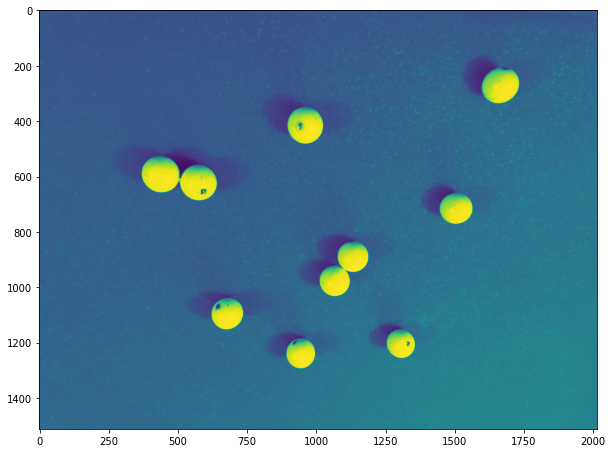

In [139]:
plt.figure(figsize = (10, 10))
plt.imshow(img)
pass

In [140]:
_, img_bin = cv2.threshold(img,120,255,cv2.THRESH_BINARY)

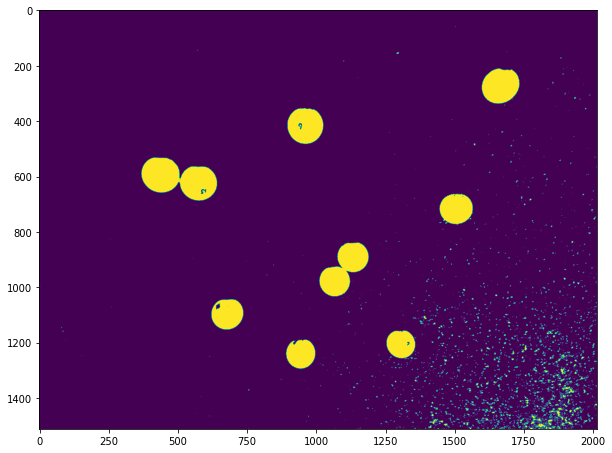

In [141]:
plt.figure(figsize = (10, 10))
plt.imshow(img_bin)
pass

In [142]:
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
img_bin_m = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, structuring_element, iterations=20)

structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
img_bin_m = cv2.erode(img_bin_m,structuring_element, iterations = 4)

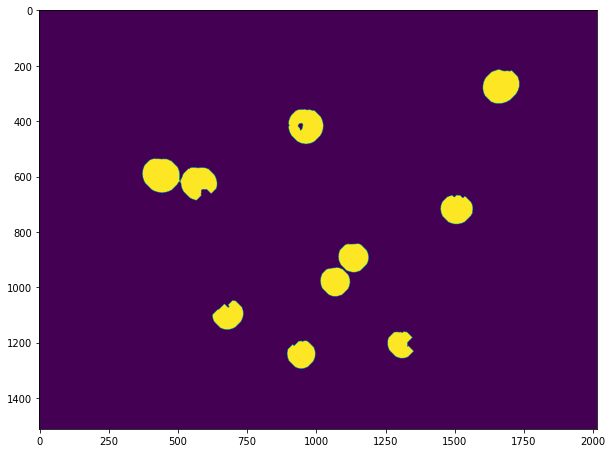

In [143]:
plt.figure(figsize = (10, 10))
plt.imshow(img_bin_m)
pass

In [144]:
contours, hierarchy = cv2.findContours(img_bin_m, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [145]:
print('Balls count: {}'.format(len(contours)))

Balls count: 10


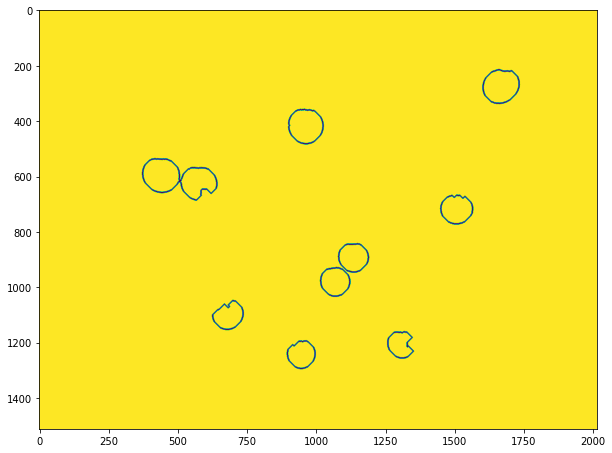

In [146]:
plt.figure(figsize = (10, 10))
plt.imshow(cv2.drawContours(np.ones(img.shape), contours, -1, (0,0,255), 3))
pass

In [147]:
balls_radiuses = []
for c in contours:
  center, radius = cv2.minEnclosingCircle(c)
  balls_radiuses.append(radius)
  source = cv2.circle(source, (int(center[0]), int(center[1])), int(radius), (197, 82, 255), 10)

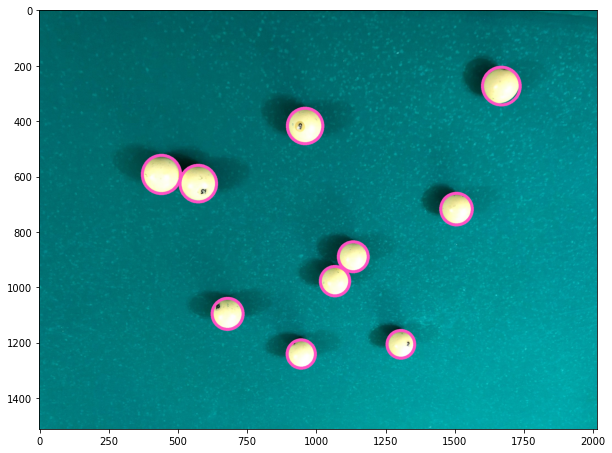

In [148]:
plt.figure(figsize = (10, 10))
plt.imshow(cv2.cvtColor(source, cv2.COLOR_BGR2RGB))
pass

In [149]:
import numpy as np

print("Математическое ожидание: {}".format(np.mean(balls_radiuses)))
print("Дисперсия: {}".format(np.var(balls_radiuses)))

59.40379295349121
45.7559499666428
